In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 


In [406]:
df = pd.read_excel('Датасет.xlsx', index_col='Date',parse_dates=True)

In [23]:
def find_count(days,station):
    tod = datetime.datetime.now()
    d = datetime.timedelta(days=days)
    a = (tod - d).replace(hour=0, minute=0, second=0, microsecond=0)
    print(df[station][a])

In [24]:
find_count(19,'Красносельская')

15424


## Preprocessing

In [407]:
df.fillna(df.mean(),inplace=True)

In [408]:
df = df.sort_index()

In [381]:
df['weekday'] = (df.index.dayofweek < 5).astype(int)
df['weekend'] = (df.index.dayofweek >= 5).astype(int)

In [382]:
df

,Б.Рокоссовского,Черкизовская,Преображенск. пл,Сокольники СЛ,Красносельская,Комсомольск. СЛ,Красные ворота,Чистые пруды,Лубянка,Охотный ряд,...,Нижегород-я НБС,К,Пыхтино,Аэропорт Внуково,Яхромская,Лианозово,Физтех,Текстильщики СЦ,weekday,weekend
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,16671,6248,14094,18651,7391,8883,3067,12873,8554,19856,...,16779,18248,8390,15787,9813,18978,1476,18055,1,0
2024-01-02,15113,5441,1132,10083,19339,15442,7139,11038,15482,7671,...,14810,8141,16045,10257,19663,8499,2893,18422,1,0
2024-01-03,2905,7991,6556,6488,15424,15055,18002,2430,6545,19685,...,1040,10399,18903,13493,12491,2959,9897,14815,1,0
2024-01-04,13998,14864,7265,6409,10725,2531,19411,18152,10221,12608,...,13876,4981,13176,8656,9180,12203,9793,16915,1,0
2024-01-05,12742,10015,4001,9446,5965,7285,9990,7456,9020,17311,...,13691,15525,16827,5761,3563,9070,9822,6052,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-30,13714,6496,8365,18759,7746,5709,1873,15867,4428,13439,...,15953,3694,14040,19801,14759,5616,3834,13438,0,1
2024-03-31,2561,15991,2811,5573,8936,15712,2772,11590,10987,13708,...,9599,9883,10988,17569,14798,16496,5997,7997,0,1
2024-04-01,11209,7029,5004,15017,11373,5649,10104,4453,5127,15905,...,13688,3650,8035,13950,17189,8603,5933,10796,1,0


In [329]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Черкизовская'])

In [350]:
sns.heatmap(df,annot=True)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [341]:
X

,Б.Рокоссовского,Черкизовская,Преображенск. пл,Сокольники СЛ,Красносельская,Комсомольск. СЛ,Красные ворота,Чистые пруды,Лубянка,Охотный ряд,...,Нижегород-я НБС,К,Пыхтино,Аэропорт Внуково,Яхромская,Лианозово,Физтех,Текстильщики СЦ,weekday,weekend
0,16671,6248,14094,18651,7391,8883,3067,12873,8554,19856,...,16779,18248,8390,15787,9813,18978,1476,18055,1,0
1,15113,5441,1132,10083,19339,15442,7139,11038,15482,7671,...,14810,8141,16045,10257,19663,8499,2893,18422,1,0
2,2905,7991,6556,6488,15424,15055,18002,2430,6545,19685,...,1040,10399,18903,13493,12491,2959,9897,14815,1,0
3,13998,14864,7265,6409,10725,2531,19411,18152,10221,12608,...,13876,4981,13176,8656,9180,12203,9793,16915,1,0
4,12742,10015,4001,9446,5965,7285,9990,7456,9020,17311,...,13691,15525,16827,5761,3563,9070,9822,6052,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,13714,6496,8365,18759,7746,5709,1873,15867,4428,13439,...,15953,3694,14040,19801,14759,5616,3834,13438,0,1
90,2561,15991,2811,5573,8936,15712,2772,11590,10987,13708,...,9599,9883,10988,17569,14798,16496,5997,7997,0,1
91,11209,7029,5004,15017,11373,5649,10104,4453,5127,15905,...,13688,3650,8035,13950,17189,8603,5933,10796,1,0
92,2722,3999,17068,14176,19561,4700,3868,14364,15485,2078,...,18652,10583,11124,7545,3864,16046,4969,11741,1,0


In [342]:
y

0    2024-01-01
1    2024-01-02
2    2024-01-03
3    2024-01-04
4    2024-01-05
        ...    
89   2024-03-30
90   2024-03-31
91   2024-04-01
92   2024-04-02
93   2024-04-03
Name: Date, Length: 94, dtype: datetime64[ns]

## EDA

In [356]:
df

,Date,Б.Рокоссовского,Черкизовская,Преображенск. пл,Сокольники СЛ,Красносельская,Комсомольск. СЛ,Красные ворота,Чистые пруды,Лубянка,...,Нижегород-я НБС,К,Пыхтино,Аэропорт Внуково,Яхромская,Лианозово,Физтех,Текстильщики СЦ,weekday,weekend
0,2024-01-01,16671,6248,14094,18651,7391,8883,3067,12873,8554,...,16779,18248,8390,15787,9813,18978,1476,18055,1,0
1,2024-01-02,15113,5441,1132,10083,19339,15442,7139,11038,15482,...,14810,8141,16045,10257,19663,8499,2893,18422,1,0
2,2024-01-03,2905,7991,6556,6488,15424,15055,18002,2430,6545,...,1040,10399,18903,13493,12491,2959,9897,14815,1,0
3,2024-01-04,13998,14864,7265,6409,10725,2531,19411,18152,10221,...,13876,4981,13176,8656,9180,12203,9793,16915,1,0
4,2024-01-05,12742,10015,4001,9446,5965,7285,9990,7456,9020,...,13691,15525,16827,5761,3563,9070,9822,6052,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2024-03-30,13714,6496,8365,18759,7746,5709,1873,15867,4428,...,15953,3694,14040,19801,14759,5616,3834,13438,0,1
90,2024-03-31,2561,15991,2811,5573,8936,15712,2772,11590,10987,...,9599,9883,10988,17569,14798,16496,5997,7997,0,1
91,2024-04-01,11209,7029,5004,15017,11373,5649,10104,4453,5127,...,13688,3650,8035,13950,17189,8603,5933,10796,1,0
92,2024-04-02,2722,3999,17068,14176,19561,4700,3868,14364,15485,...,18652,10583,11124,7545,3864,16046,4969,11741,1,0


In [409]:
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Физтех'])
plt.title('Временой ряд пассажиропотока')
plt.xlabel('Дата и время')
plt.ylabel('Пассажиропоток')
plt.grid(True)
plt.show()

KeyError: 'Date'

<Figure size 1200x400 with 0 Axes>

##  Train
`

In [376]:
from statsmodels.tsa.arima.model import ARIMA

In [389]:
df1 = df['Черкизовская']

In [391]:
train_data

Date
2024-01-01     6248
2024-01-02     5441
2024-01-03     7991
2024-01-04    14864
2024-01-05    10015
              ...  
2024-03-12    11854
2024-03-13     1667
2024-03-14     5797
2024-03-15    12029
2024-03-16     1828
Name: Черкизовская, Length: 76, dtype: int64

In [390]:
train_data = df1.iloc[:76]
test_data = df1.iloc[76:]

In [392]:
import itertools
import statsmodels.api as sm

# Подбор оптимальных параметров ARIMA
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

best_aic = float('inf')
best_order = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = sm.tsa.ARIMA(train_data, order=(p, d, q))
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (p, d, q)
    except:
        continue

print("Best ARIMA Order:", best_order)

# Обучение ARIMA модели с лучшими параметрами
arima_model = sm.tsa.ARIMA(train_data, order=best_order)
arima_fit = arima_model.fit()

d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Best ARIMA Order: (0, 2, 2)


d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [393]:
# Создание и обучение модели ARIMA
model = ARIMA(train_data, order=(0, 2, 2))
arima_model = model.fit()

# Прогнозирование
forecast = arima_model.forecast(steps=len(test_data))

# Оценка модели
mse = ((forecast - test_data.squeeze()) ** 2).mean()
print("Mean Squared Error:", mse)

d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Squared Error: 31288766.646399934


d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [400]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Предположим, ваш DataFrame называется 'data', а столбец с пассажиропотоком - 'passengers'
data = df.set_index(pd.DatetimeIndex(df.index))
train, test = data['Черкизовская'].iloc[:-30], data['Черкизовская'].iloc[-30:]

model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

forecast = model_fit.forecast(30)  # Прогноз на 30 дней вперед

# Получаем фактические и предсказанные значения
pred = model_fit.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)

# Вычисляем MSE на тестовой выборке
mse = ((test - pred.predicted_mean) ** 2).mean()
print(f"MSE: {mse}")

d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


MSE: 62289387.73239254


d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [405]:
df.columns.to_list()

['Б.Рокоссовского',
 'Черкизовская',
 'Преображенск. пл',
 'Сокольники СЛ',
 'Красносельская',
 'Комсомольск. СЛ',
 'Красные ворота',
 'Чистые пруды',
 'Лубянка',
 'Охотный ряд',
 'Кропоткинская',
 'Парк культуры СЛ',
 'Фрунзенская',
 'Спортивная',
 'Воробьёвы горы',
 'Университет',
 'Пр-т Вернадск.СЛ',
 'Юго-западная',
 'Красногвардейск.',
 'Домодедовская',
 'Орехово',
 'Царицыно',
 'Кантемировская',
 'Коломенская',
 'Автозаводская',
 'Павелецкая ЗЛ',
 'Новокузнецкая',
 'Театральная(Зам)',
 'Тверская',
 'Маяковская',
 'Белорусская ЗЛ',
 'Динамо',
 'Аэропорт',
 'Сокол',
 'Войковская',
 'Водный Стадион',
 'Речной вокзал',
 'Каширская',
 'Каховская',
 'Варшавская',
 'Киевская АПЛ',
 'Смоленская АПЛ',
 'Арбатская АПЛ',
 'Пл. Революции',
 'Курская АПЛ',
 'Бауманская',
 'Электрозав-я АПЛ',
 'Семёновская',
 'Партизанская',
 'Измайловская',
 'Первомайская',
 'Щёлковская',
 'Александр. сад',
 'Арбатская ФЛ',
 'Смоленская ФЛ',
 'Студенческая',
 'Кутузовская ФЛ',
 'Фили',
 'Багратионовская',
 'Ф

In [411]:
for x in df.columns.to_list():


# Предположим, ваш DataFrame называется 'data', а столбец с пассажиропотоком - 'passengers'
    train, test = data[x].iloc[:-30], data[x].iloc[-30:]

model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

forecast = model_fit.forecast(30)  # Прогноз на 30 дней вперед

# Получаем фактические и предсказанные значения
pred = model_fit.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)

# Вычисляем MSE на тестовой выборке
mse = ((test - pred.predicted_mean) ** 2).mean()
print(f"MSE: {mse}")

d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


MSE: 70528439.4183753


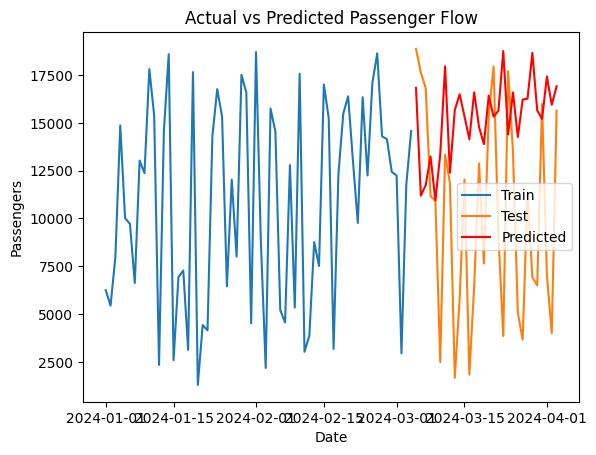

In [404]:
import matplotlib.pyplot as plt

# Построение графика фактических значений
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')

# Построение графика предсказанных значений и доверительных интервалов
plt.plot(pred.predicted_mean.index, pred.predicted_mean, color='red', label='Predicted')
# Добавление подписей к осям и заголовка
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Actual vs Predicted Passenger Flow')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()


In [414]:


# Предположим, что ваш DataFrame называется 'data', а столбцы станций имеют имена 'station_1', 'station_2', и т.д.
stations = data.columns[:5]

for station in stations:
    # Разделение данных на обучающий и тестовый наборы
    train, test = data[station].iloc[:-30], data[station].iloc[-30:]

    # Создание и обучение модели SARIMA
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()

    # Прогнозирование
    forecast = model_fit.forecast(30)

    # Получаем фактические и предсказанные значения
    pred = model_fit.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)

    # Вычисляем MSE на тестовой выборке
    mse = ((test - pred.predicted_mean) ** 2).mean()
    print(f"Station: {station}, MSE: {mse}")


d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Station: Б.Рокоссовского, MSE: 51192127.33037229


d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: Va

Station: Черкизовская, MSE: 62289387.73239254


d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Station: Преображенск. пл, MSE: 50441220.80432853


d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Station: Сокольники СЛ, MSE: 34397774.536212094
Station: Красносельская, MSE: 31538573.342504445


d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving 

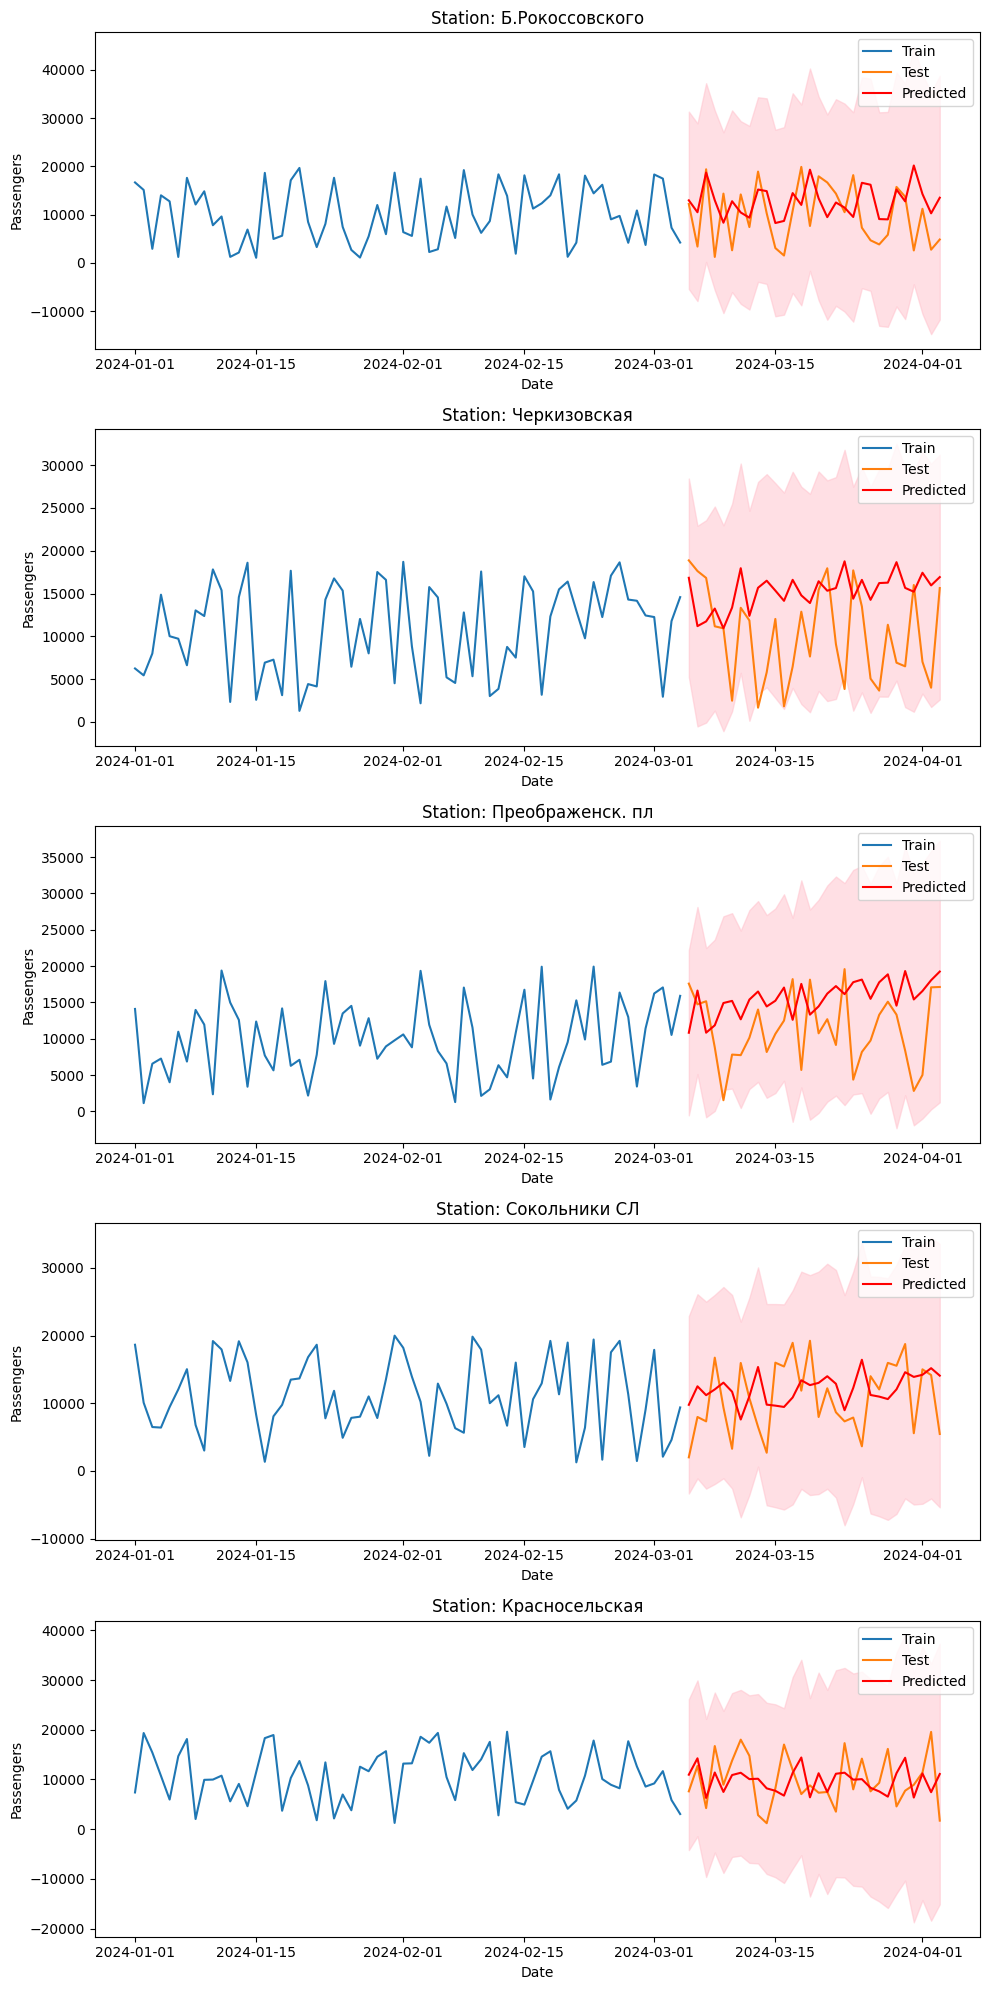

In [417]:
import matplotlib.pyplot as plt

# Создание подложки для графиков
fig, axes = plt.subplots(len(stations), figsize=(10, 4*len(stations)))

for i, station in enumerate(stations):
    # Разделение данных на обучающий и тестовый наборы
    train, test = data[station].iloc[:-30], data[station].iloc[-30:]

    # Создание и обучение модели SARIMA
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()

    # Прогнозирование
    forecast = model_fit.forecast(30)

    # Получаем фактические и предсказанные значения
    pred = model_fit.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)

    # Построение графика сравнения предсказанных и фактических значений для текущей станции
    axes[i].plot(train.index, train, label='Train')
    axes[i].plot(test.index, test, label='Test')
    axes[i].plot(pred.predicted_mean.index, pred.predicted_mean, color='red', label='Predicted')
    axes[i].fill_between(pred.conf_int().index, pred.conf_int()['lower '+station], pred.conf_int()['upper '+station], color='pink', alpha=0.5)
    axes[i].set_title(f'Station: {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passengers')
    axes[i].legend()

# Размещение графиков
plt.tight_layout()
plt.show()
